In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)

top_words = 5000 # 상위 단어 5000개

# 학습용,검증용 5:5

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)

X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)

print(X_test.shape)

print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

# create the model

embedding_vecor_length = 32 #벡터사이즈

model = Sequential()

# 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))

model.add(Embedding(top_words, embedding_vecor_length, input_shape=(max_review_length,)))

# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로

model.add(LSTM(100)) # Long Short-Term Memory

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
hist=model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.5266 - loss: 0.6928
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.6966 - loss: 0.6834
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.6564 - loss: 0.6420
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.6798 - loss: 0.6005
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.8199 - loss: 0.4296
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.8928 - loss: 0.2876
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.9495 - loss: 0.1468
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9758 - loss: 0.0830
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9960 - loss: 0.0303
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.9808 - loss: 0.0655


In [5]:
# Final evaluation of the model

scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9876 - loss: 0.0621
Accuracy: 99.10%


In [6]:
scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7196 - loss: 0.7391
Accuracy: 71.10%


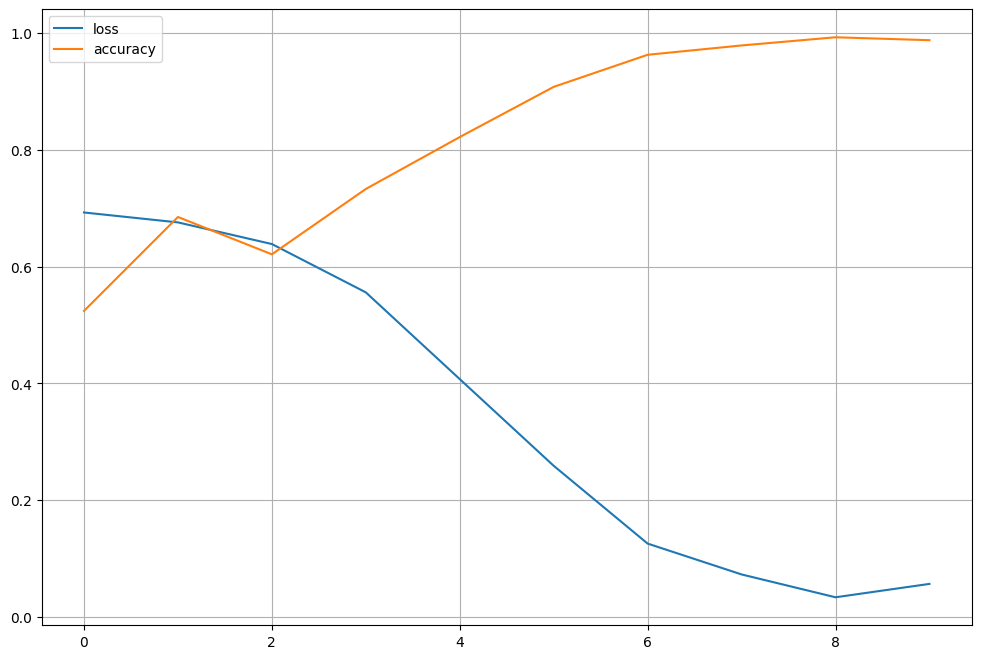

In [7]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()